<a href="https://colab.research.google.com/github/SunkiAsha/Time_Series_Forecasting/blob/main/TIME_SERIES_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/netflix.csv")
df.head()

Date      High       Low      Open     Close       Volume  Adj Close
0  2002-05-23  1.242857  1.145714  1.156429  1.196429  104790000.0   1.196429
1  2002-05-24  1.225000  1.197143  1.214286  1.210000   11104800.0   1.210000
2  2002-05-28  1.232143  1.157143  1.213571  1.157143    6609400.0   1.157143
3  2002-05-29  1.164286  1.085714  1.164286  1.103571    6757800.0   1.103571
4  2002-05-30  1.107857  1.071429  1.107857  1.071429   10154200.0   1.071429

In [ ]:
df.describe()

High          Low         Open        Close        Volume  \
count  4881.000000  4881.000000  4881.000000  4881.000000  4.881000e+03   
mean    107.003361   103.742674   105.388477   105.434149  1.679949e+07   
std     159.326383   154.662309   157.007060   157.073188  1.936794e+07   
min       0.410714     0.346429     0.377857     0.372857  2.856000e+05   
25%       3.977143     3.838571     3.901429     3.906429  6.286300e+06   
50%      22.261429    21.150000    21.524286    21.632856  1.082310e+07   
75%     127.430000   123.589996   125.949997   125.389999  2.015640e+07   
max     646.840027   630.859985   642.229980   639.099976  3.234140e+08   

         Adj Close  
count  4881.000000  
mean    105.434149  
std     157.073188  
min       0.372857  
25%       3.906429  
50%      21.632856  
75%     125.389999  
max     639.099976

In [ ]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

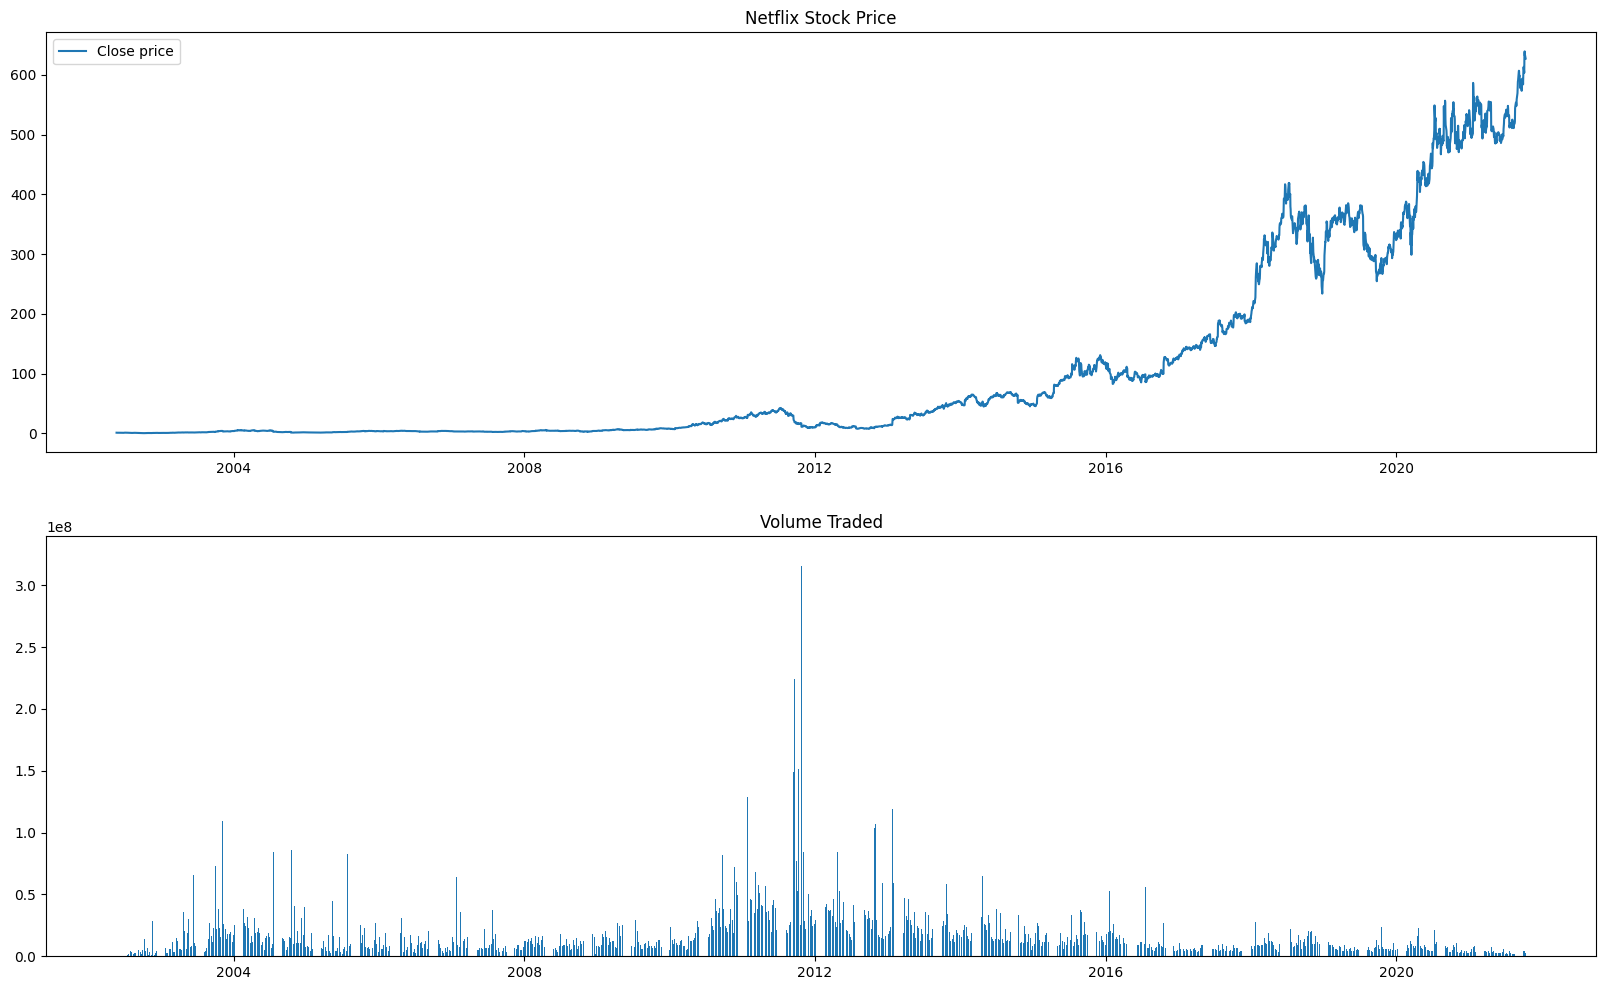

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Netflix Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()

<ipython-input-10-1162fcc13d5f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'], ax=ax)


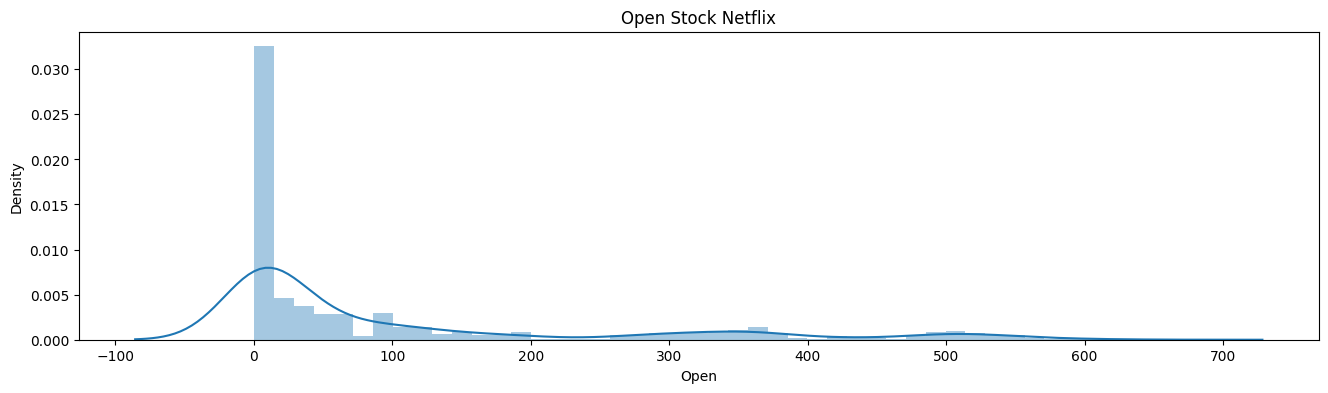

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pyplot
# Look at Open Stock
fig, ax = pyplot.subplots(figsize=[16,4])
sns.distplot(df['Open'], ax=ax)
ax.set_title('Open Stock Netflix')
pyplot.show()

<ipython-input-11-c26573dc95b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'], ax=ax)


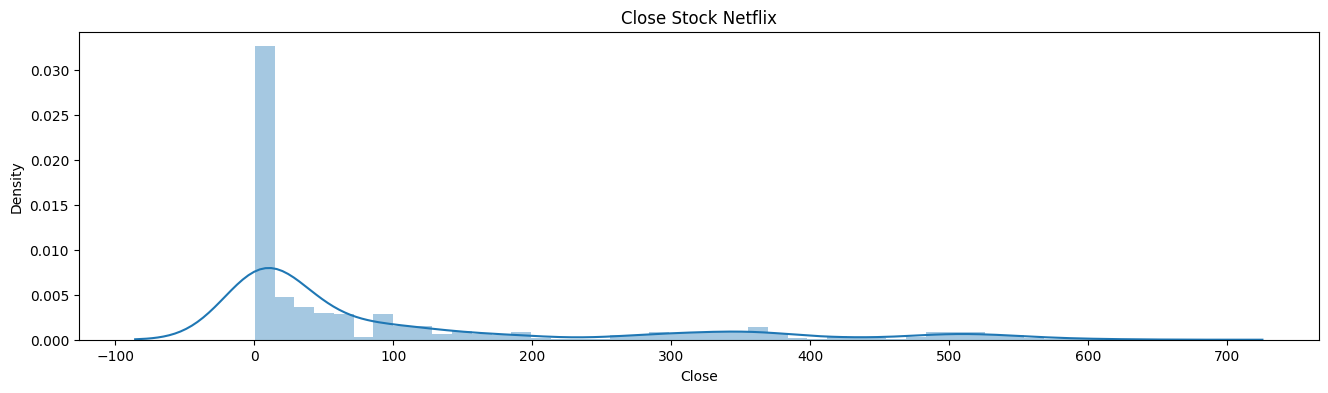

In [ ]:
# Look at Close Stock
fig, ax = pyplot.subplots(figsize=[16,4])
sns.distplot(df['Close'], ax=ax)
ax.set_title('Close Stock Netflix')
pyplot.show()

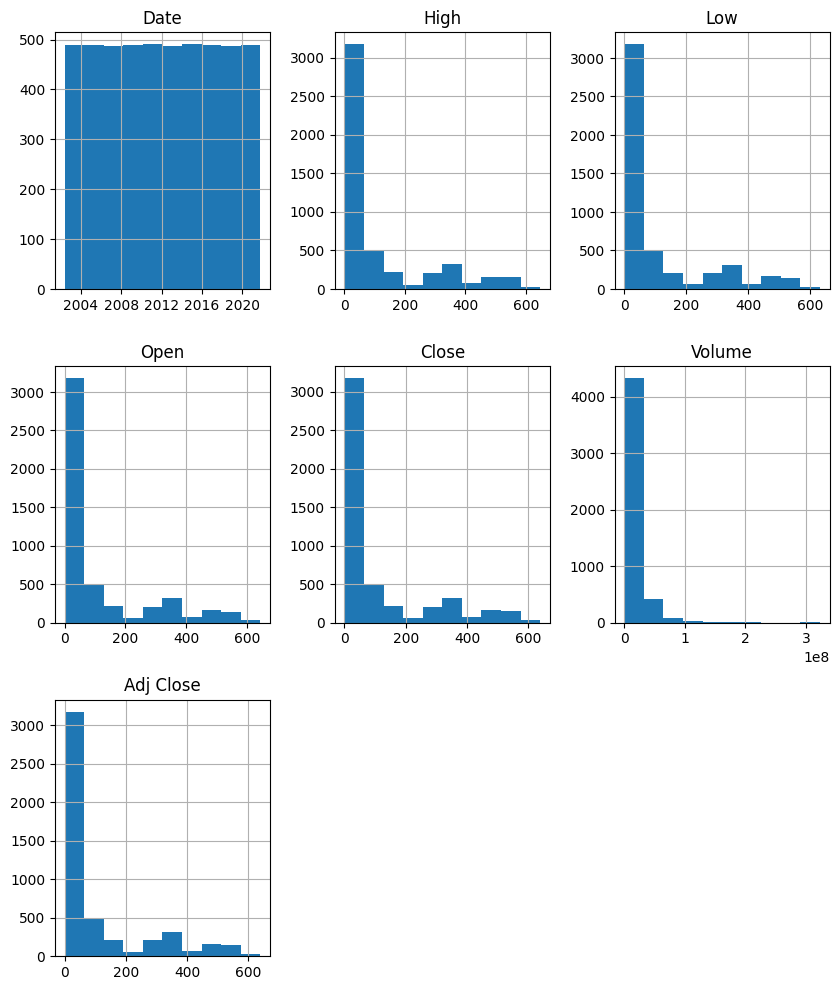

In [ ]:
df.hist(figsize=(10, 12))
pyplot.show()

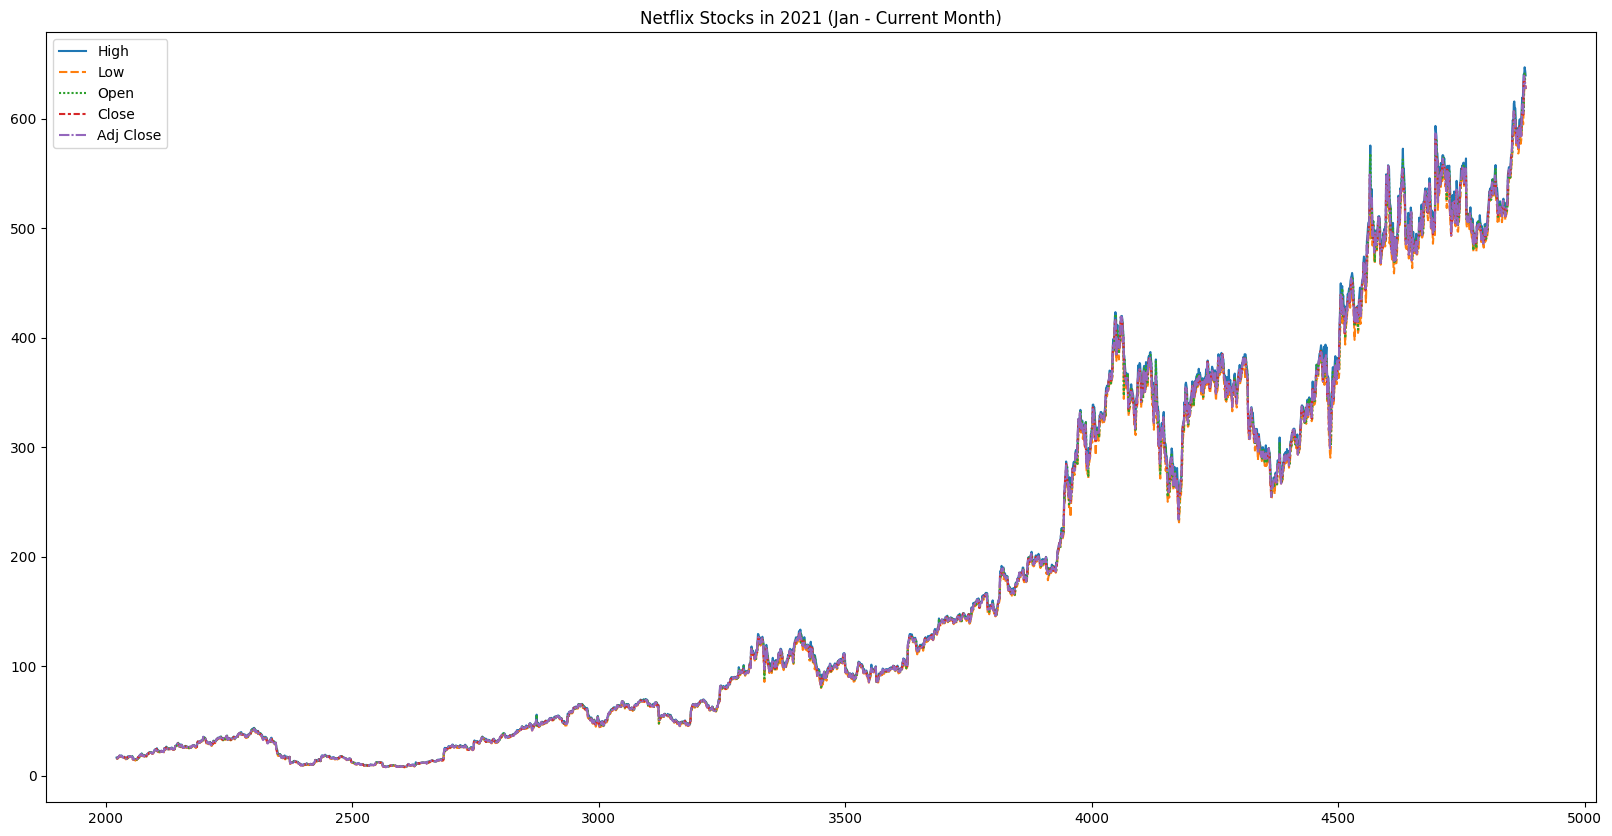

In [ ]:
# Plotting Data
pyplot.figure(figsize=(20,10))
sns.lineplot(data=data.loc['2021-01':])
pyplot.title('Netflix Stocks in 2021 (Jan - Current Month)')
pyplot.show()

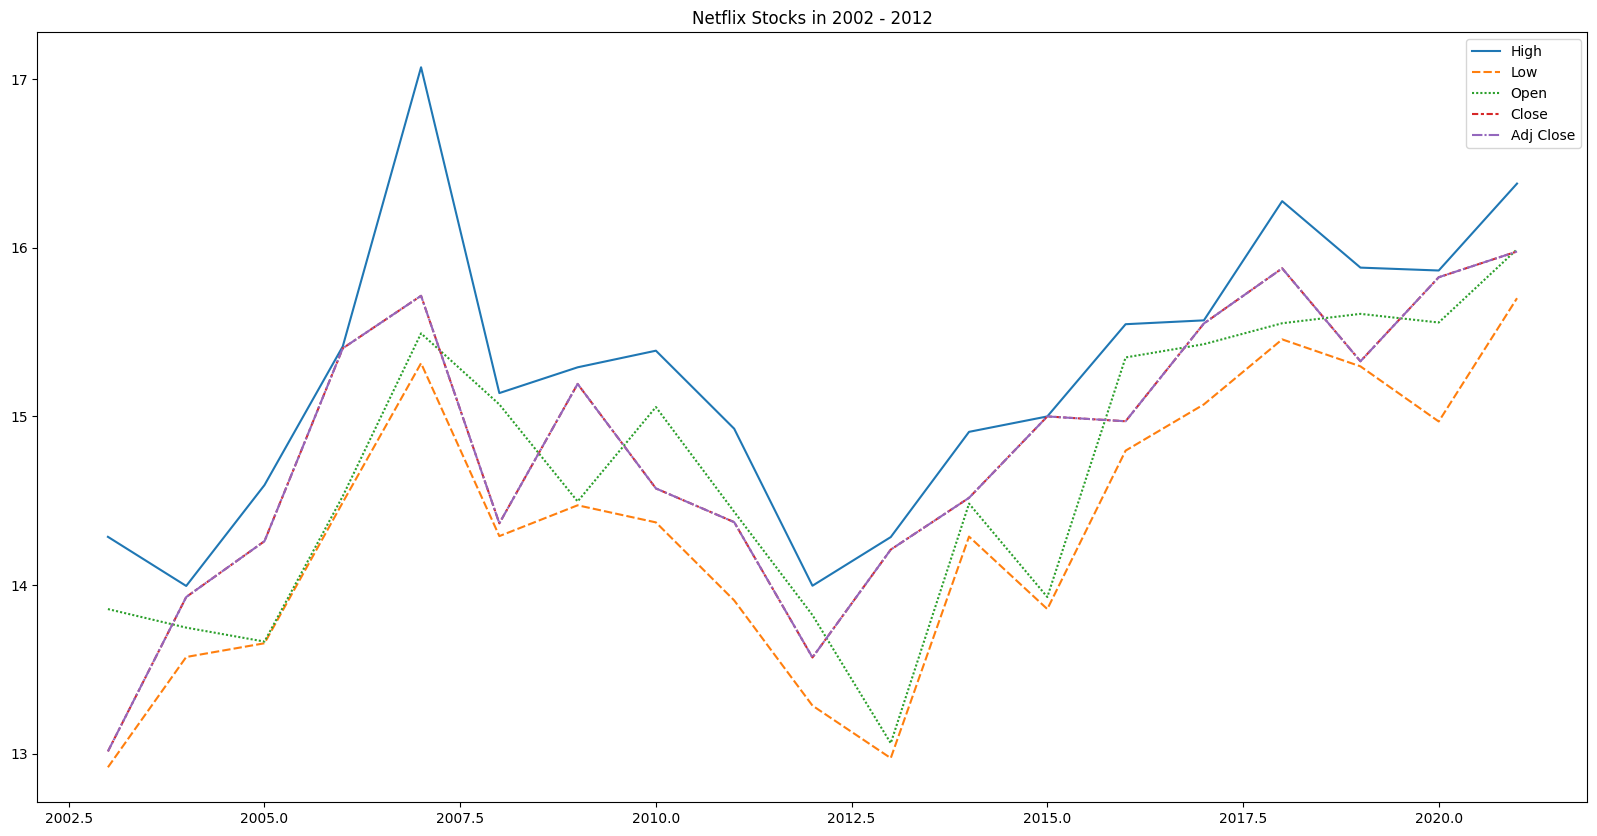

In [ ]:
# Plotting Data
pyplot.figure(figsize=(20,10))
sns.lineplot(data=data.loc['2002-05-23':'2021-10-11'])
pyplot.title('Netflix Stocks in 2002 - 2012')
pyplot.show()

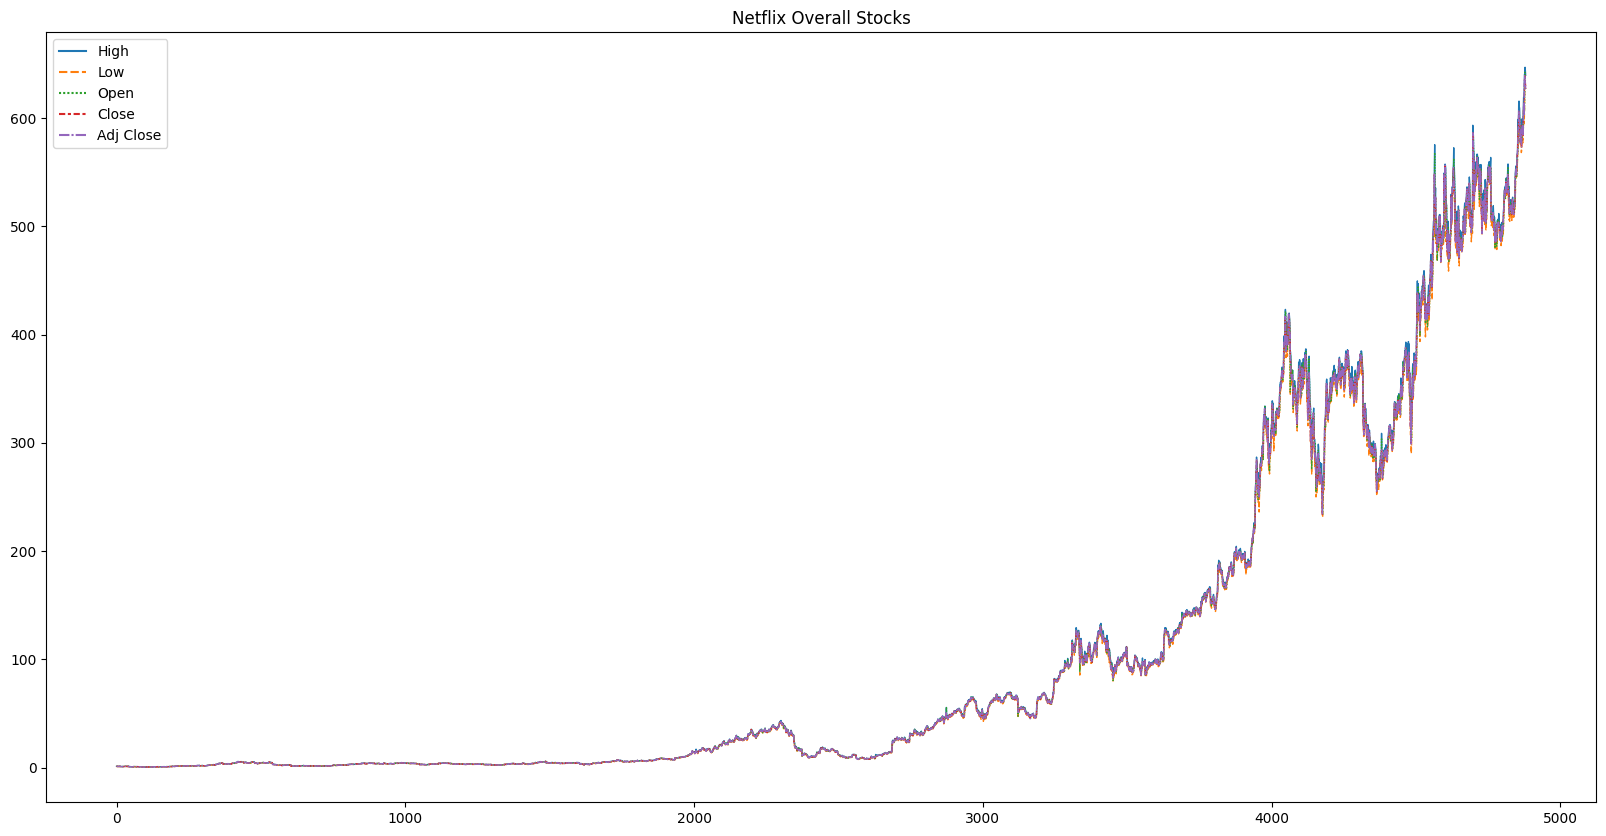

In [ ]:
# Plotting Data
pyplot.figure(figsize=(20,10))
sns.lineplot(data=data, linewidth=1)
pyplot.title('Netflix Overall Stocks')
pyplot.show()

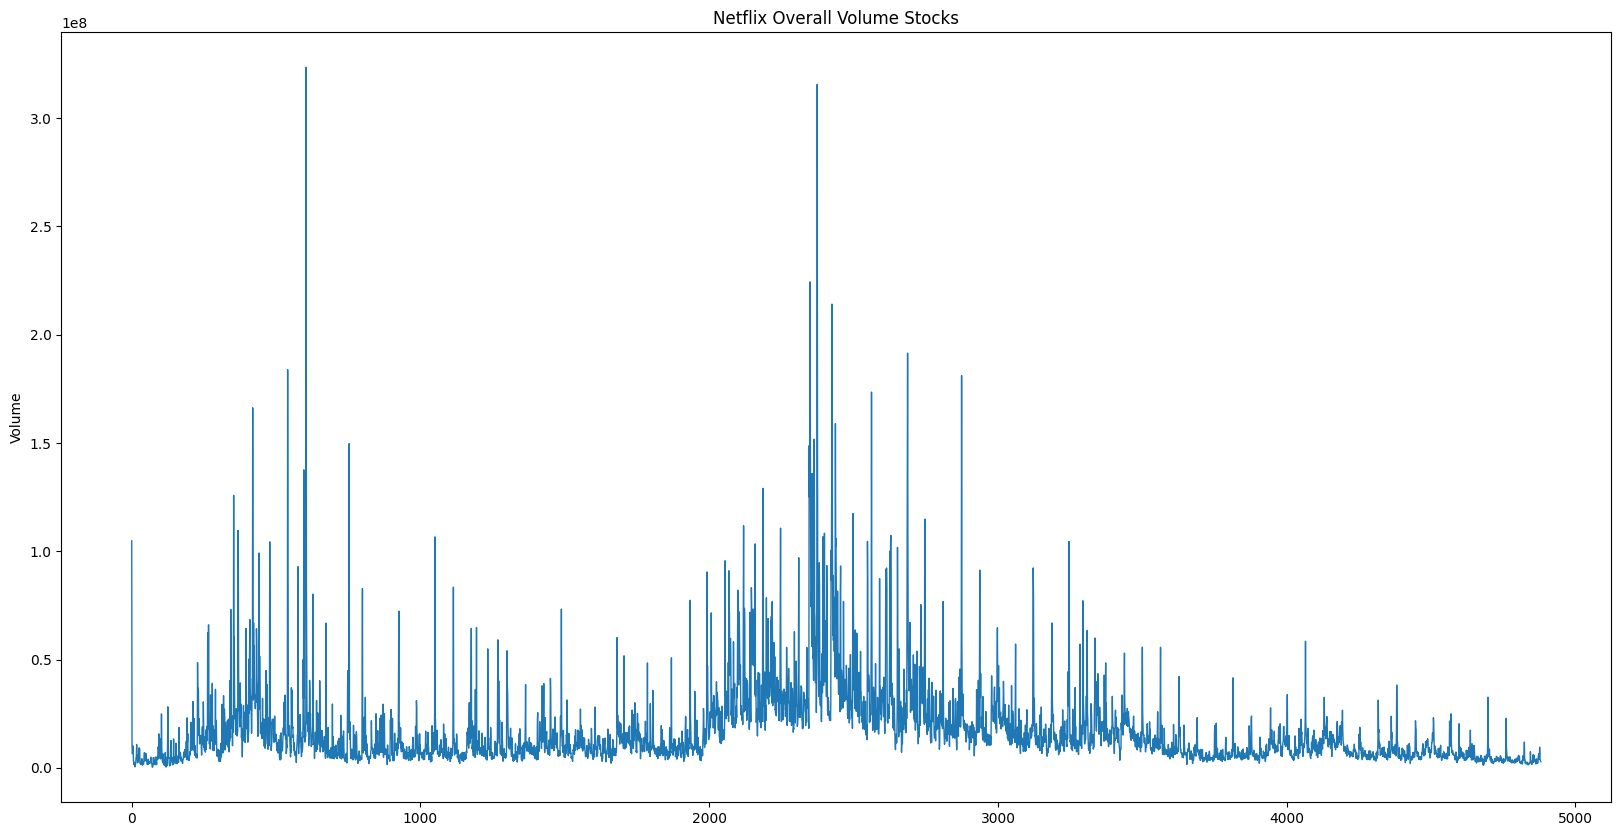

In [ ]:
volume = df['Volume']
pyplot.figure(figsize=(20,10))
sns.lineplot(data=volume, linewidth=1)
pyplot.title('Netflix Overall Volume Stocks')
pyplot.show()

<Axes: ylabel='Density'>

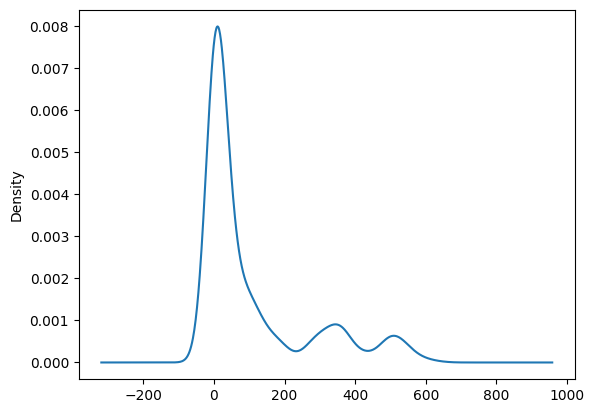

In [ ]:
#Distribution of the dataset
df_close = df['Close']
df_close.plot(kind='kde')

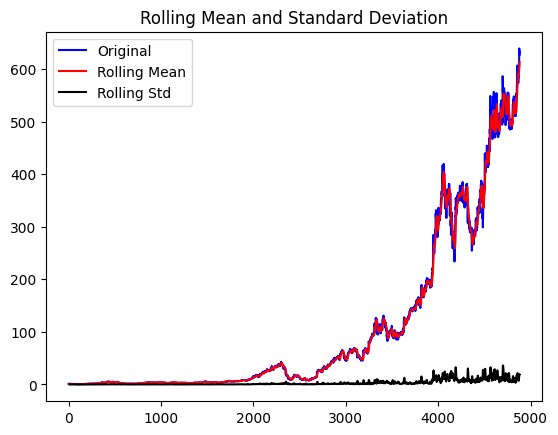

Results of dickey fuller test
Test Statistics                   2.948081
p-value                           1.000000
No. of lags used                 30.000000
Number of observations used    4850.000000
critical value (1%)              -3.431699
critical value (5%)              -2.862136
critical value (10%)             -2.567087
dtype: float64


In [ ]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [ ]:
# Accomodate Data
open_stock = df[['Open']]
close_stock = df[['Close']]
high_stock = df[['High']]
low_stock = df[['Low']]
volume_stock = df[['Volume']]

In [ ]:
# Make A Plot Function
def plot_timeseries(tdf, label1, label2, col, title):

    # Figuring the size
    pyplot.figure(figsize=(25,15))

    # Create a lineplot for data 1
    sns.lineplot(data=tdf,
                 label=label1,
                 legend=False,)

    # Create a lineplot for data 2
    sns.lineplot(data=df[col],
                 label=label2,
                 legend=False,)

    # Create a title
    pyplot.title(title)

    # Show the legend
    pyplot.legend()

    # Show the plot
    pyplot.show()

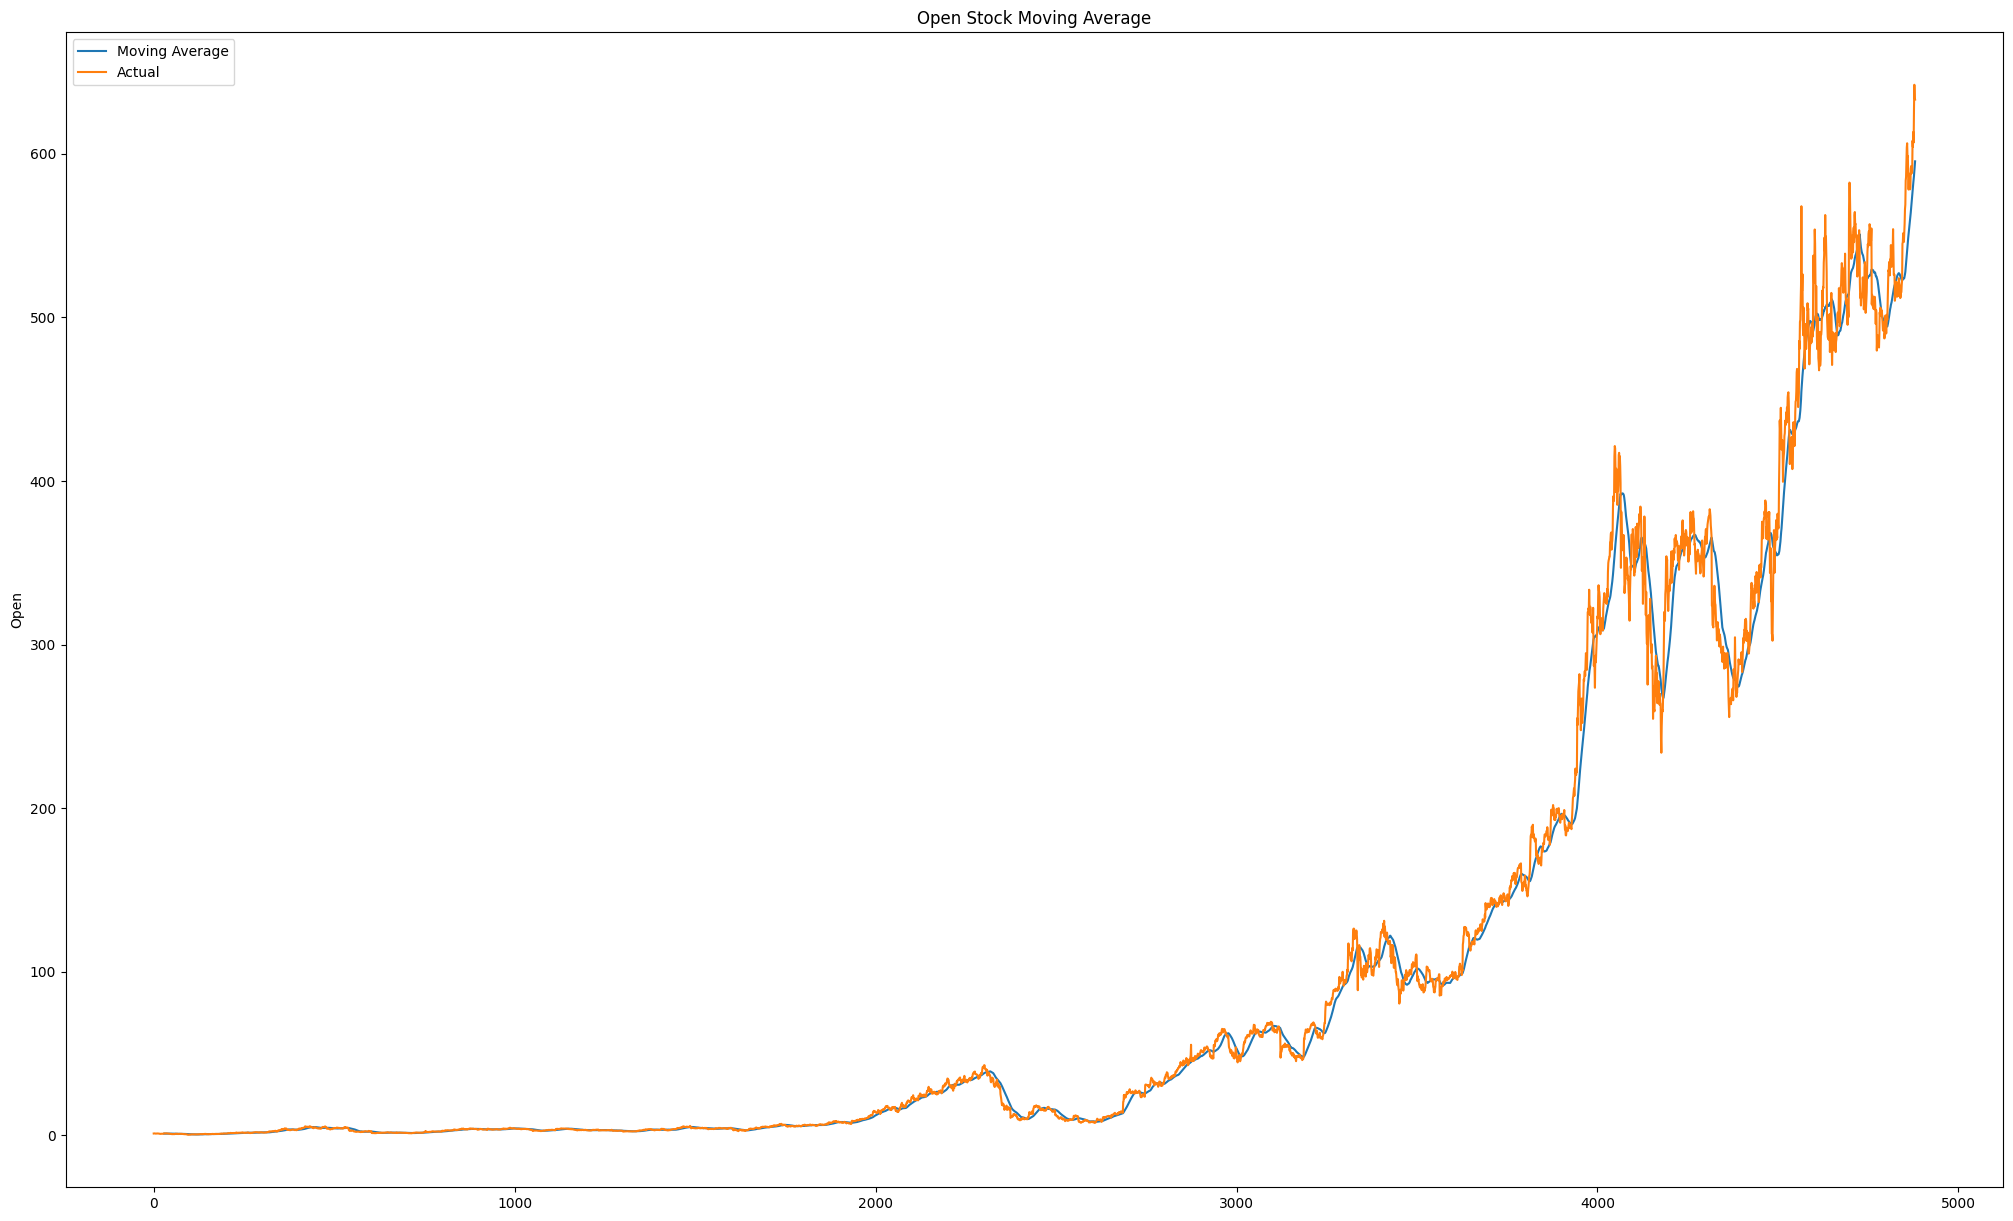

In [ ]:
# Prepare Data
simple_moving_average_open_stock = open_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_open_stock, # Data
                'Moving Average', # Label 1
                'Actual', # Label 2
                'Open', # Column of the Data
                'Open Stock Moving Average') # Title

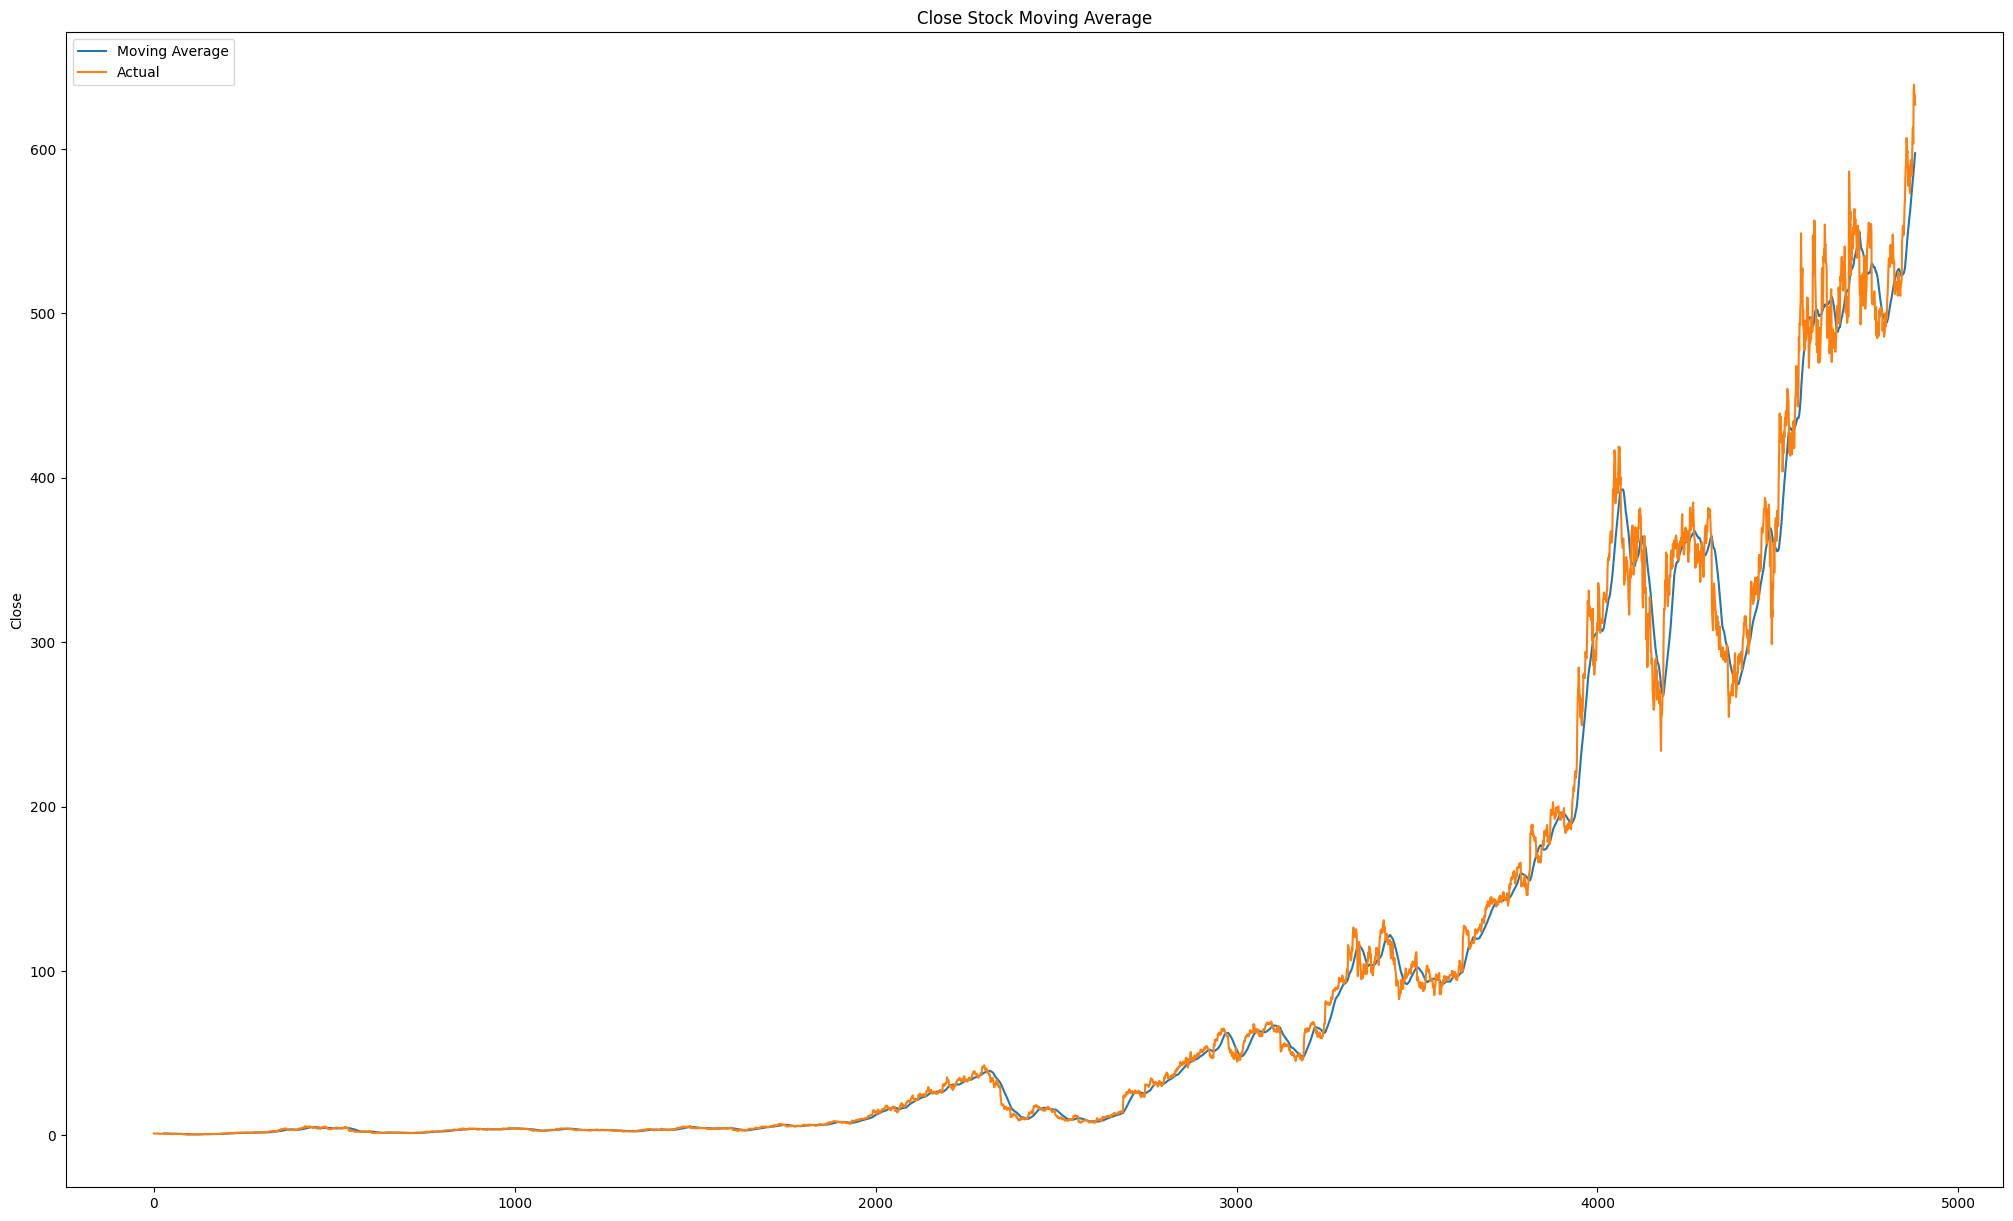

In [ ]:
# Prepare Data
simple_moving_average_close_stock = close_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_close_stock, # Data
                'Moving Average', # Label 1
                'Actual', # Label 2
                'Close', # Column of the Data
                'Close Stock Moving Average') # Title

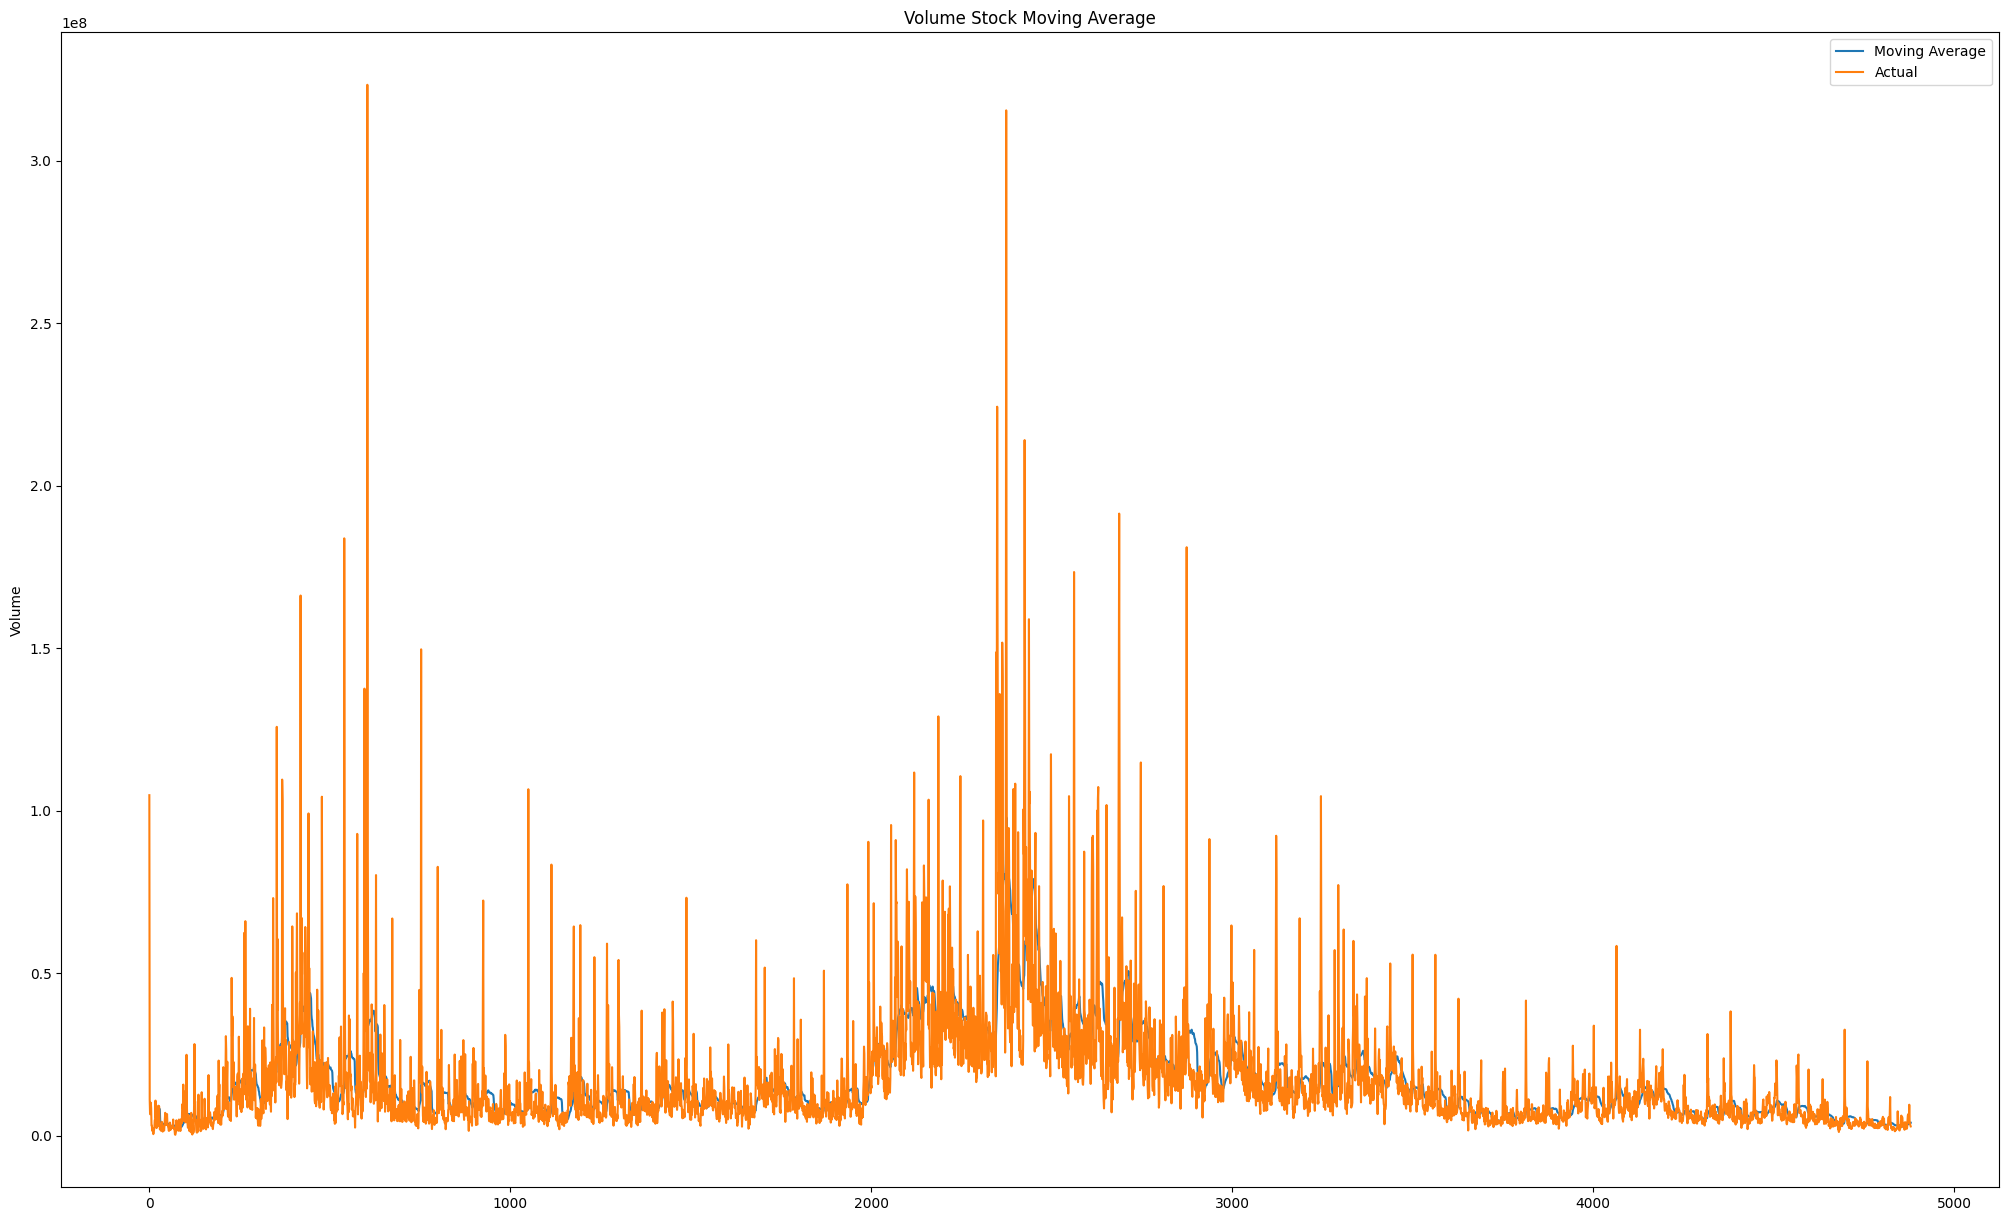

In [ ]:
# Prepare Data
simple_moving_average_volume_stock = volume_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_volume_stock, # Data
                'Moving Average', # Label 1
                'Actual', # Label 2
                'Volume', # Column of the Data
                'Volume Stock Moving Average') # Title

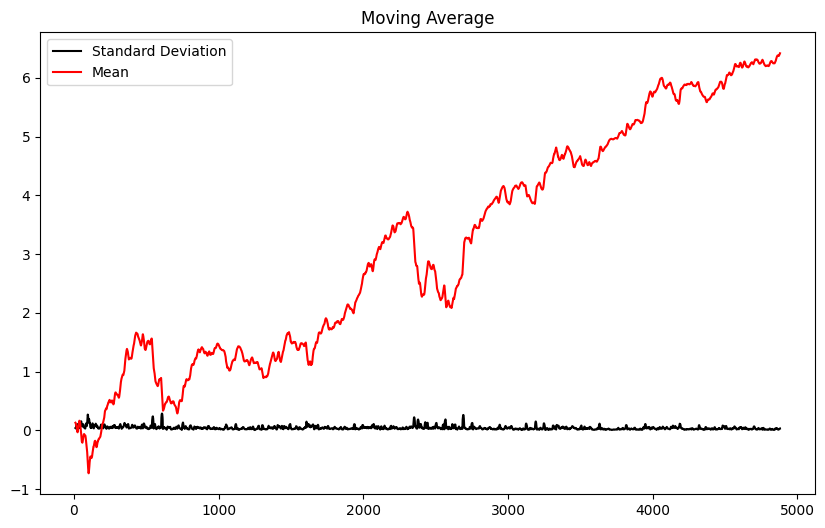

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

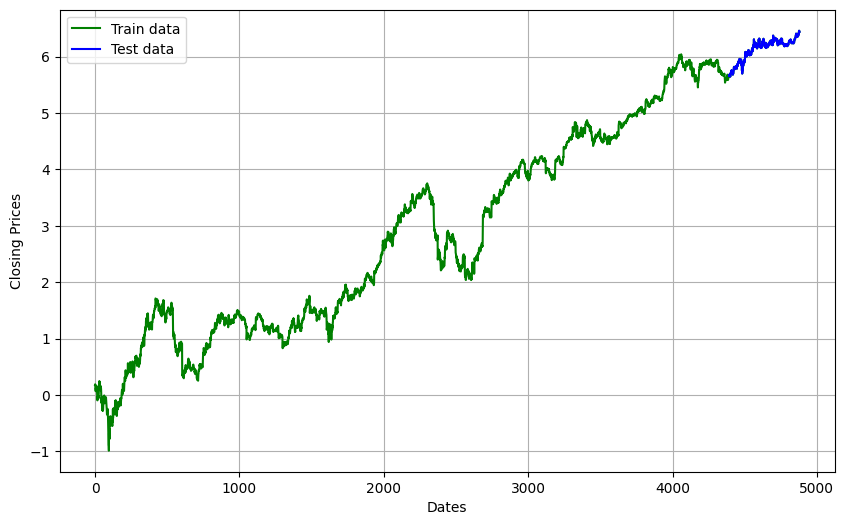

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: 2.94808136417191
p-value: 1.0


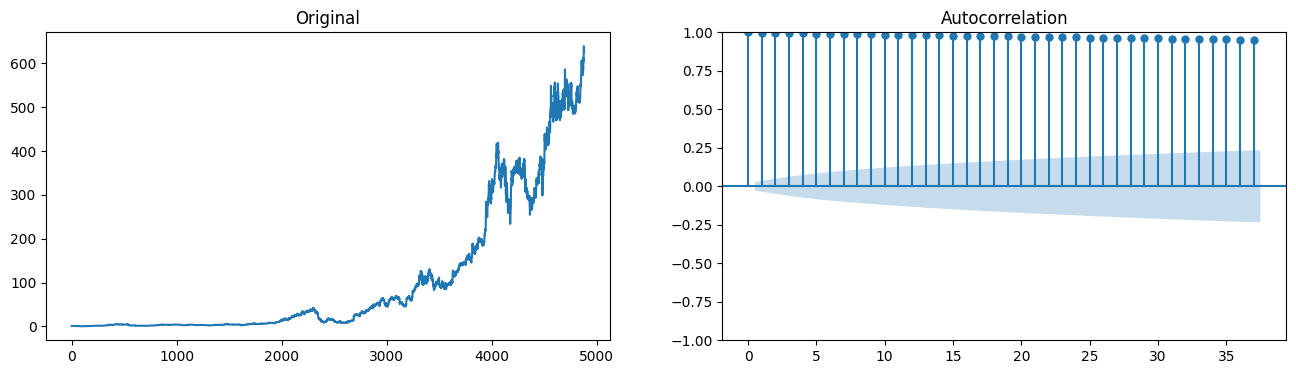

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

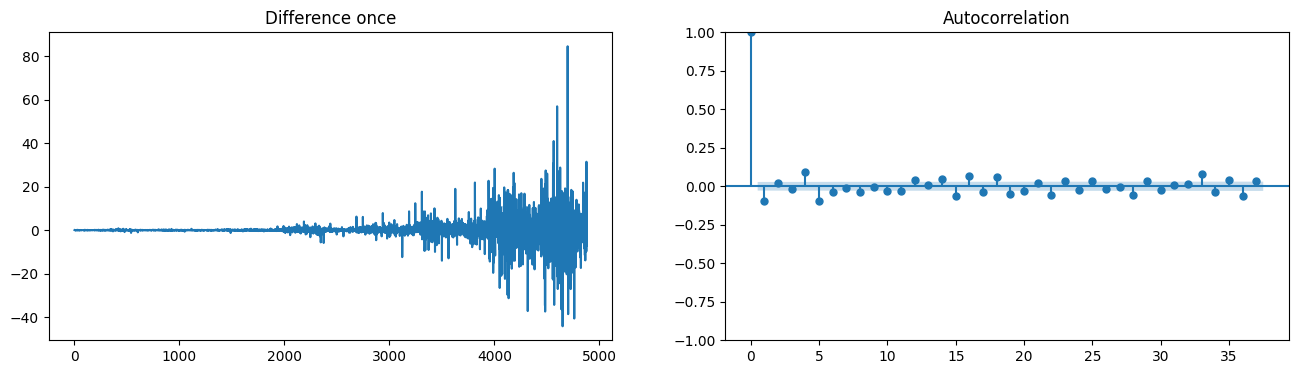

In [ ]:
diff=df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);

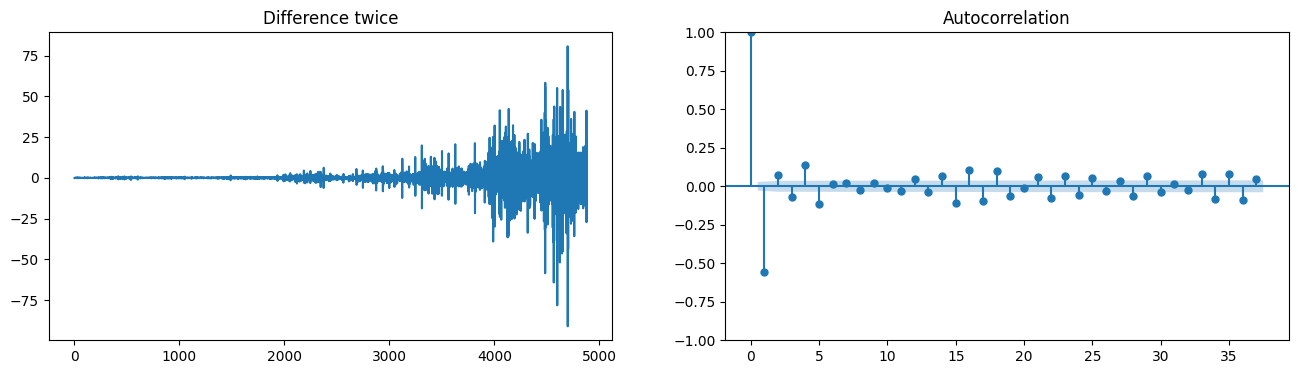

In [ ]:
diff=df.Close.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff,ax=ax2);

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df.Close,test="adf")

1

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


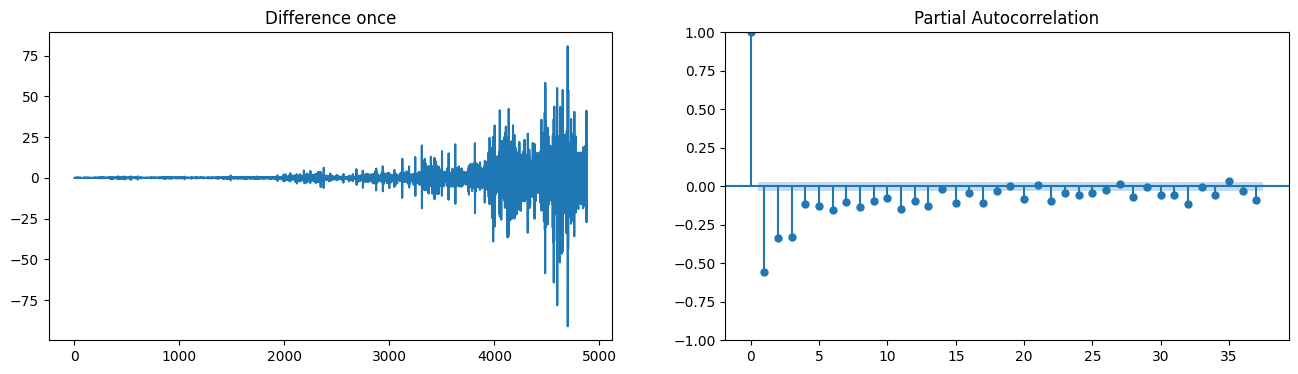

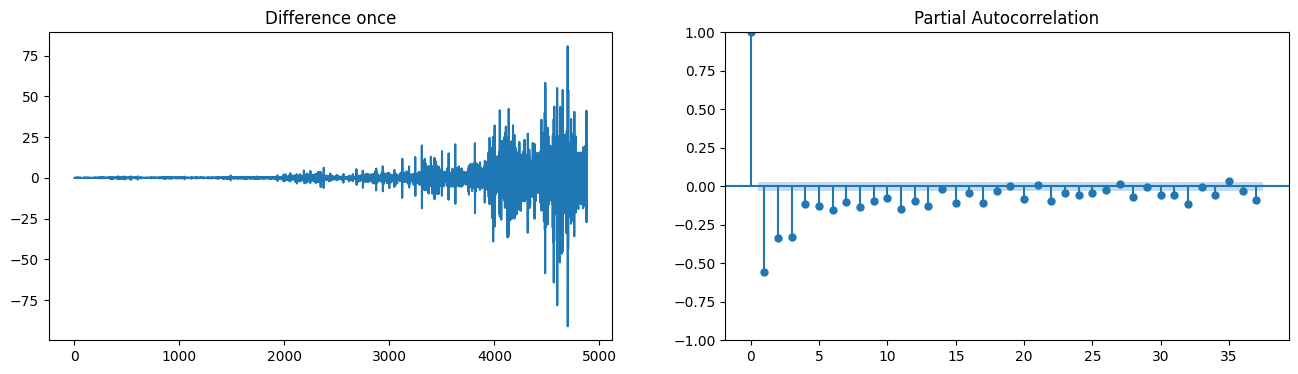

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)

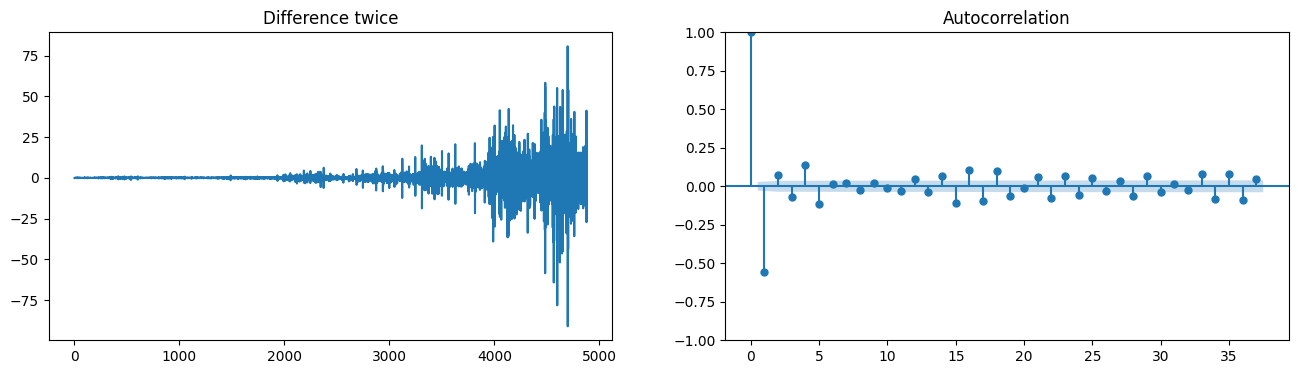

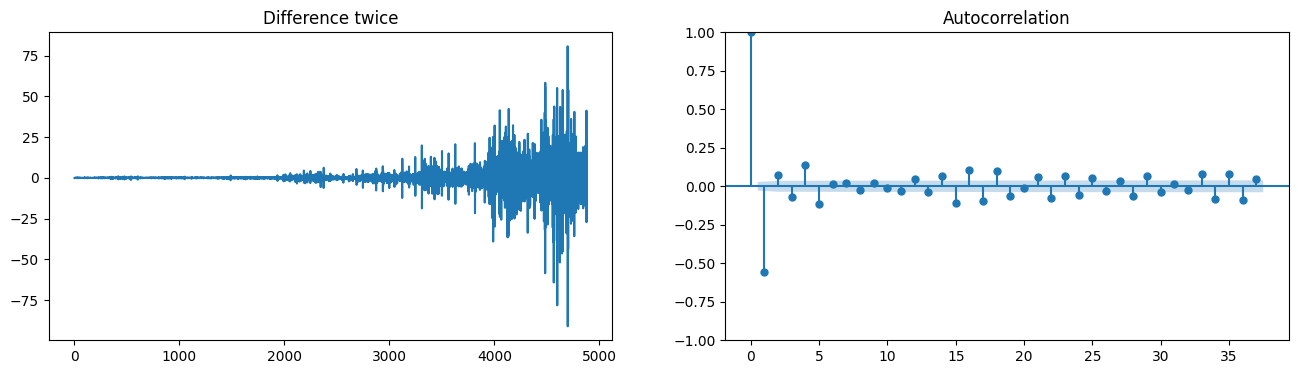

In [ ]:
diff=df.Close.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2)

**ARIMA** **MODEL**

In [ ]:
data = list(df2["Close"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  2.94808136417191
2. P-Value :  1.0
3. Num Of Lags :  30
4. Num Of Observations Used For ADF Regression: 4850
5. Critical Values :
	 1% :  -3.4316990235892413
	 5% :  -2.8621361184931735
	 10% :  -2.5670873152938674


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

4781 100


In [ ]:
stepwise_fit = ARIMA(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=6.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=32684.455, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=30901.140, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.49 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=30316.525, Time=0.60 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=29758.935, Time=0.56 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=29694.525, Time=0.78 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=29614.869, Time=0.86 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=6.84 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=5.59 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=29616.869, Time=1.99 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 25.171 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4881
Model:  

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [ ]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4881
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -14801.435
Date:                Thu, 27 Apr 2023   AIC                          29614.869
Time:                        17:14:30   BIC                          29653.826
Sample:                             0   HQIC                         29628.540
                               - 4881                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9041      0.006   -154.318      0.000      -0.916      -0.893
ar.L2         -0.7032      0.008    -91.826      0.000      -0.718      -0.688
ar.L3         -0.5122      0.008    -63.793      0.000      -0.528      -0.496
ar.L4         -0.2317      0.007    -34.896      0.000      -0.245      -0.219
ar.L5         -0.1295      0.005    -24.890      0.000      -0.140      -0.119
sigma2        25.2618      0.129    196.042      0.000      25.009      25.514
===================================================================================
Ljung-Box (L1) (Q):                   1.91   Jarque-Bera (JB):            222182.32
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):            4125.62   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([487.201821  , 502.44697933, 500.27613278, 504.84139029,
       505.19510216, 503.65219561, 506.73890876, 502.79049447,
       499.57334981, 498.62827963, 487.80030762, 492.34868317,
       493.37369351, 489.95176106, 485.21562642, 484.90409683,
       487.99314936, 499.44790511, 493.09839988, 492.69485638,
       500.94689301, 501.38118492, 499.02583687, 510.34053361,
       516.12483152, 521.57357857, 532.9966156 , 538.24740892,
       539.88700715, 532.51448975, 536.35922486, 535.99061795,
       542.81631743, 538.05439413, 530.5661654 , 537.23464861,
       536.73979218, 541.21978655, 549.77554721, 544.80852741,
       531.23924513, 531.53001343, 528.69075231, 508.97372481,
       506.46958979, 510.27789409, 512.21228601, 517.59276325,
       518.60532406, 514.74059968, 518.20848787, 515.11739962,
       509.48921035, 517.10937622, 525.10457685, 521.86411684,
       521.55816315, 516.72066531, 511.52818207, 509.4490487 ,
       513.64402175, 517.37360953, 519.04220217, 523.57

In [ ]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2021-05-20    487.201821
2021-05-21    502.446979
2021-05-24    500.276133
2021-05-25    504.841390
2021-05-26    505.195102
                 ...    
2021-10-05    608.530440
2021-10-06    639.973454
2021-10-07    647.872304
2021-10-08    637.023716
2021-10-11    640.287839
Length: 100, dtype: float64

<Axes: xlabel='Date'>

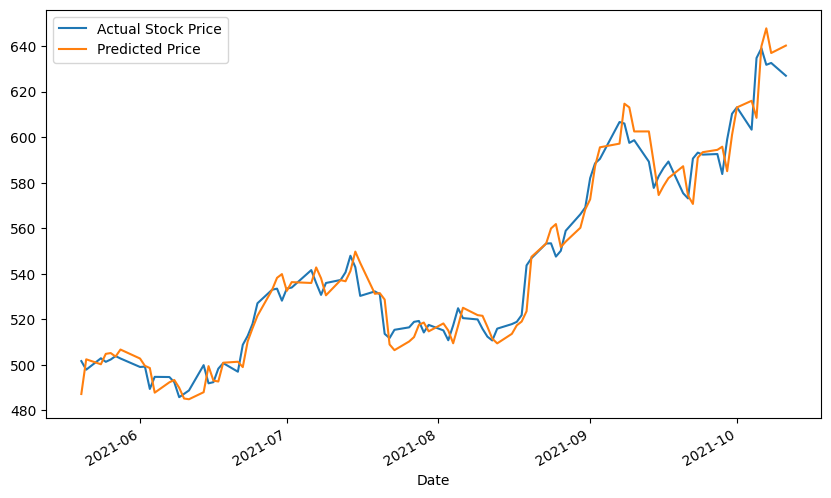

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

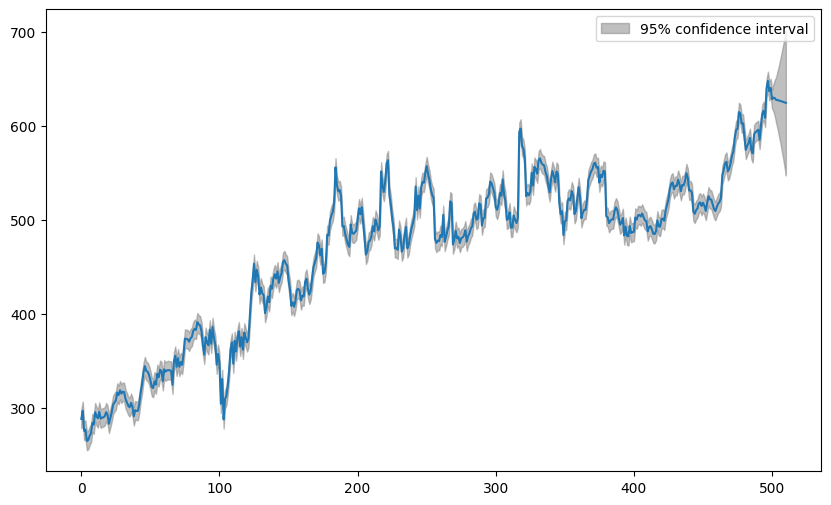

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

7.891925316594093

In [ ]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9629335372438197

In [ ]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([640.28783946, 628.42913924, 630.0658322 , 629.47040022,
       627.57492926, 627.50639056, 626.87860244, 626.62277505,
       626.07834294, 625.56481595, 624.92877131])

In [ ]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    640.287839
2022-01-01    628.429139
2022-01-02    630.065832
2022-01-03    629.470400
2022-01-04    627.574929
2022-01-05    627.506391
2022-01-06    626.878602
2022-01-07    626.622775
2022-01-08    626.078343
2022-01-09    625.564816
2022-01-10    624.928771
dtype: float64

<Axes: xlabel='Date'>

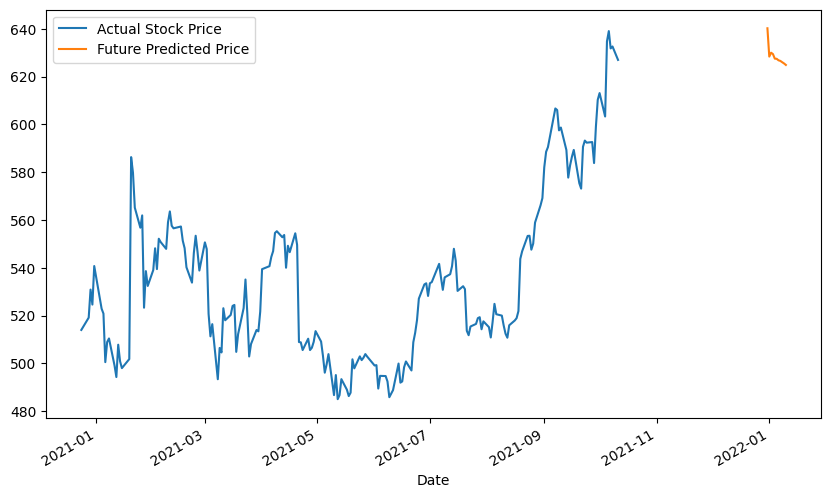

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

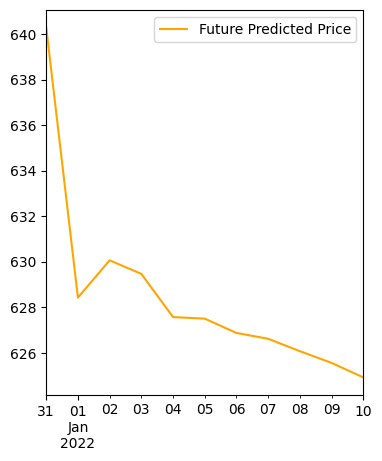

In [ ]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 1)
#check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()

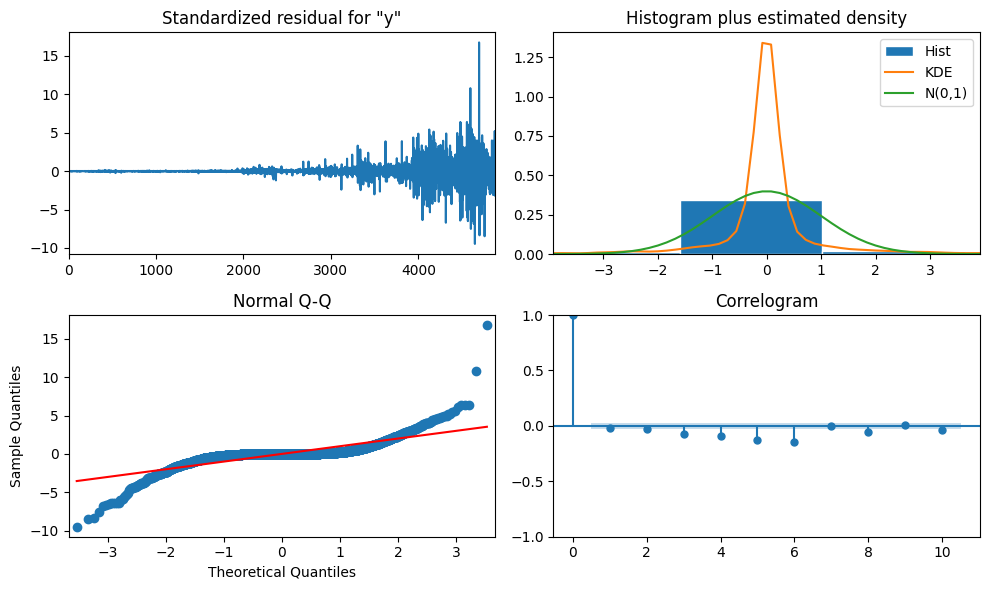

In [ ]:
model.plot_diagnostics()
plt.tight_layout()
plt.show()

**SARIMAX** **MODEL**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
df1 = pd.read_csv("/content/netflix.csv")

In [ ]:
df1.Date= pd.to_datetime(df1.Date)
df2 =df1.set_index('Date')

In [ ]:
data = list(df2["Close"])

In [ ]:
x_train= data[:-1000]
x_test = data[-1000:]
print(len(x_train),len(x_test))

3881 1000


In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.74 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=32684.455, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=30901.140, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.95 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=30316.525, Time=0.47 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=29758.935, Time=0.59 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=29694.525, Time=1.47 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=29614.869, Time=1.74 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.81 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=3.86 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=29616.869, Time=2.02 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 19.910 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4881
Model:  

In [ ]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("/content/netflix.csv")
df = pd.read_csv("/content/netflix.csv",index_col="Date")

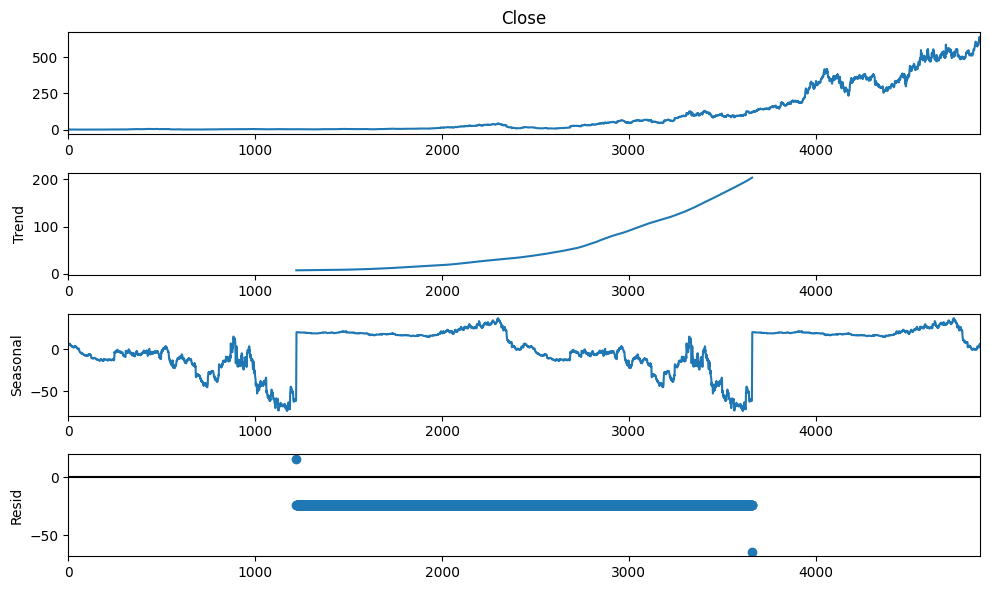

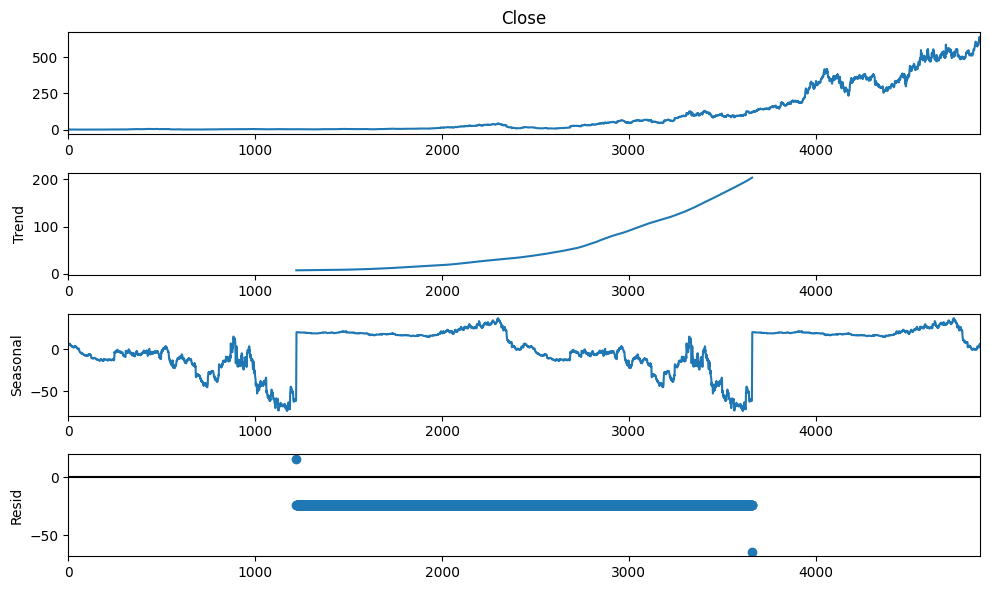

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df["Close"],model="additive",period=int(len(df)/2))
decompose_data.plot()

<Axes: xlabel='Date'>

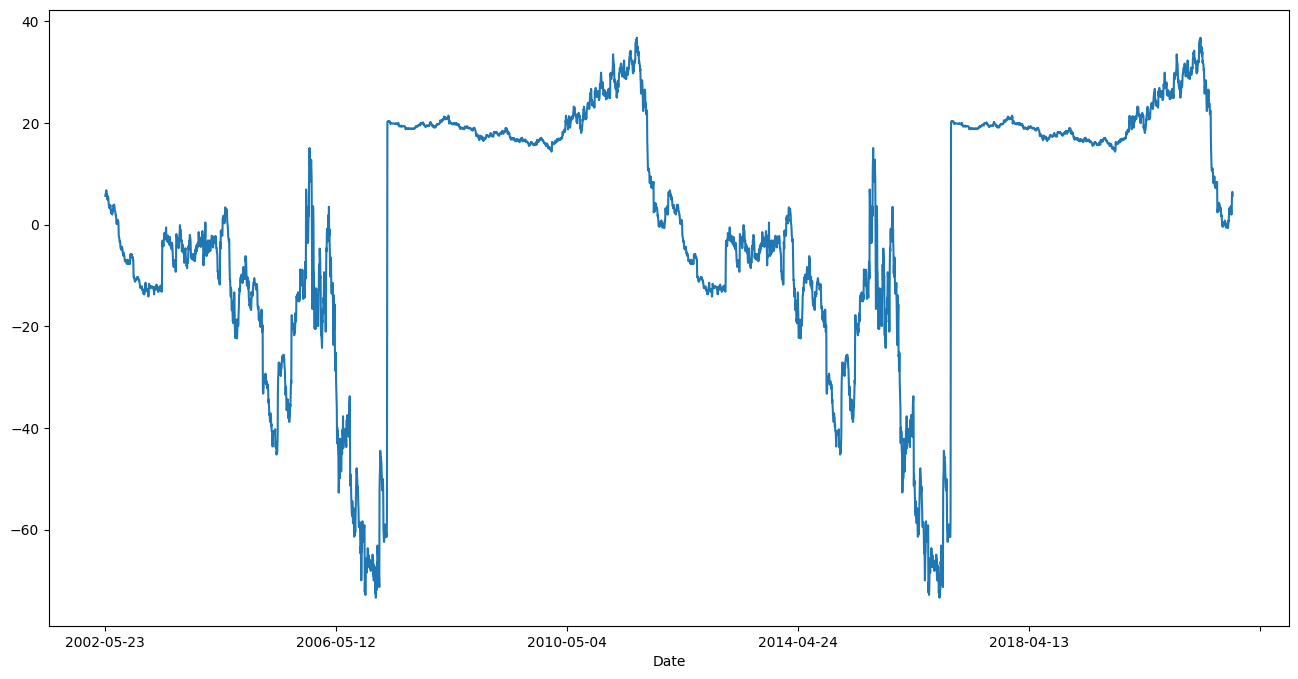

In [ ]:
decompose_data.seasonal.plot(figsize=(16,8))

**LSTM** **MODEL**

In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
data=pd.read_csv('/content/netflix.csv')
data[0:3]

Date      High       Low      Open     Close       Volume  Adj Close
0  2002-05-23  1.242857  1.145714  1.156429  1.196429  104790000.0   1.196429
1  2002-05-24  1.225000  1.197143  1.214286  1.210000   11104800.0   1.210000
2  2002-05-28  1.232143  1.157143  1.213571  1.157143    6609400.0   1.157143

In [ ]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'].rolling(window=14).mean(),name="netflix"),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="NETFLIX")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [ ]:
n=len(data)
train_data=data[0:(n//10)*9]
test_data=data[(n//10)*9:]

In [ ]:
test_data[0:3]

Date        High         Low        Open       Close     Volume  \
4392  2019-11-01  289.119995  283.019989  288.700012  286.809998  5594300.0   
4393  2019-11-04  295.390015  287.160004  288.000000  292.859985  5566200.0   
4394  2019-11-05  291.190002  286.309998  289.989990  288.029999  4062400.0   

       Adj Close  
4392  286.809998  
4393  292.859985  
4394  288.029999

In [ ]:
print(len(train_data))
print(len(test_data))

4392
489


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data['Open'].values.reshape(-1,1))

In [ ]:
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-10):      ######
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+10, 0])      ###### predict 10 days after

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(4352, 30, 1)
(4352,)


In [ ]:
def LSTM_model():

    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    return model

In [ ]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
his=model.fit(x_train,y_train,epochs=20,batch_size=32,callbacks=[checkpointer])

Epoch 1/20
135/136 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 4.6296e-04

136/136 [==============================] - 13s 51ms/step - loss: 0.0054 - accuracy: 4.5956e-04
Epoch 2/20
136/136 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 4.5956e-04

136/136 [==============================] - 6s 41ms/step - loss: 0.0018 - accuracy: 4.5956e-04
Epoch 3/20
136/136 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 4.5956e-04

136/136 [==============================] - 7s 51ms/step - loss: 0.0018 - accuracy: 4.5956e-04
Epoch 4/20
135/136 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 4.6296e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0018 - accuracy: 4.5956e-04
Epoch 5/20
136/136 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 4.5956e-04

136/136 [==============================] - 7s 52ms/step - loss: 0.0016 - accuracy: 4.5956e-04
Epoch 6/20
136/136 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 4.5956e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0015 - accuracy: 4.5956e-04
Epoch 7/20
136/136 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 4.5956e-04

136/136 [==============================] - 7s 52ms/step - loss: 0.0014 - accuracy: 4.5956e-04
Epoch 8/20
135/136 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 2.3148e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0016 - accuracy: 4.5956e-04
Epoch 9/20
135/136 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 4.6296e-04

136/136 [==============================] - 7s 51ms/step - loss: 0.0015 - accuracy: 4.5956e-04
Epoch 10/20
135/136 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 4.6296e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0014 - accuracy: 4.5956e-04
Epoch 11/20
136/136 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 4.5956e-04

136/136 [==============================] - 7s 49ms/step - loss: 0.0012 - accuracy: 4.5956e-04
Epoch 12/20
135/136 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 4.6296e-04

136/136 [==============================] - 7s 53ms/step - loss: 0.0013 - accuracy: 4.5956e-04
Epoch 13/20
136/136 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 4.5956e-04

136/136 [==============================] - 9s 67ms/step - loss: 0.0012 - accuracy: 4.5956e-04
Epoch 14/20
135/136 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 4.6296e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0012 - accuracy: 4.5956e-04
Epoch 15/20
135/136 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 4.6296e-04

136/136 [==============================] - 7s 51ms/step - loss: 0.0012 - accuracy: 4.5956e-04
Epoch 16/20
136/136 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 4.5956e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0013 - accuracy: 4.5956e-04
Epoch 17/20
136/136 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 4.5956e-04

136/136 [==============================] - 7s 51ms/step - loss: 0.0011 - accuracy: 4.5956e-04
Epoch 18/20
135/136 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 4.6296e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0012 - accuracy: 4.5956e-04
Epoch 19/20
135/136 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 4.6296e-04

136/136 [==============================] - 7s 51ms/step - loss: 0.0011 - accuracy: 4.5956e-04
Epoch 20/20
135/136 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 4.6296e-04

136/136 [==============================] - 6s 42ms/step - loss: 0.0011 - accuracy: 4.5956e-04


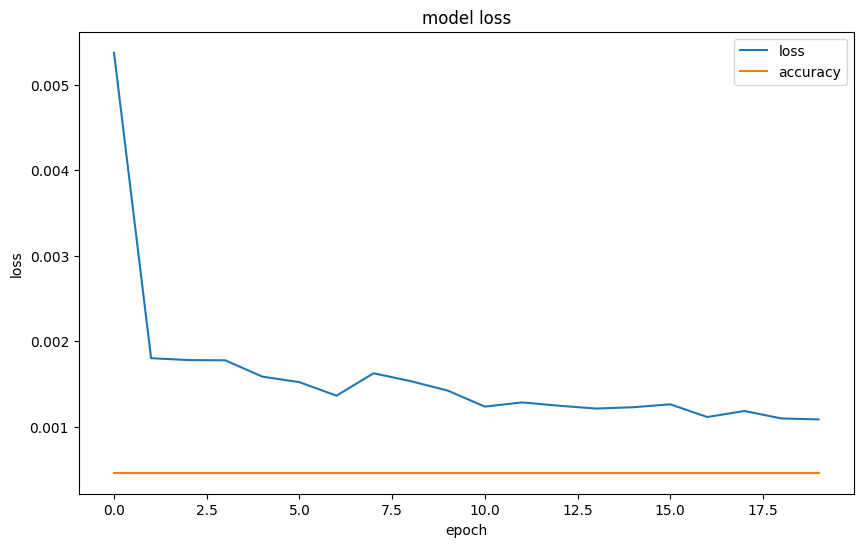

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='upper right')
plt.show()

In [ ]:
actual_prices = test_data['Open'].values
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

16/16 [==============================] - 2s 15ms/step


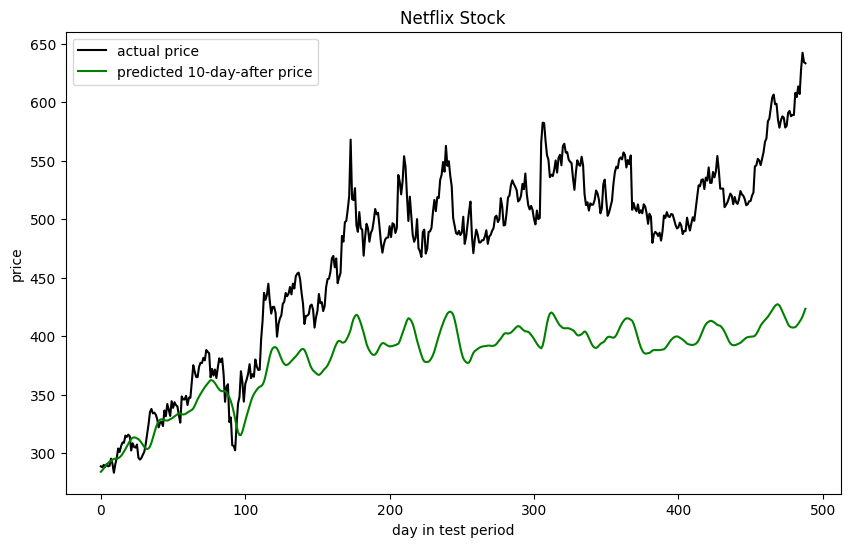

In [ ]:
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted 10-day-after price")
plt.title(f"Netflix Stock")
plt.xlabel("day in test period")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 29, 1)


In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
prediction: 421.0348205566406


**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/netflix.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
# Prepare the data for training
data['lag_1'] = data['Close'].shift(1)  # Create lagged feature
data.dropna(inplace=True)  # Drop rows with NaN values
X = data[['lag_1']]  # Features
y = data['Close']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Calculate mean squared
import numpy as np
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 48633.901070155596
Root Mean Squared Error: 220.53095263512466


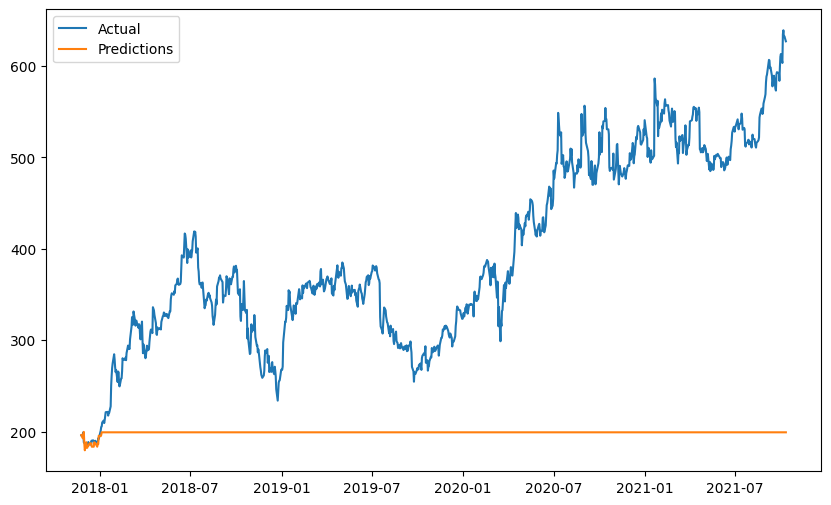

In [ ]:
# Plot predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
amse = mean_absolute_error(y_test, predictions)
print('Absolute Mean Squared Error (AMSE):', amse)

Absolute Mean Squared Error (AMSE): 195.5670594543707


**FBProphet**

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the historical stock market data into a Pandas DataFrame
data = pd.read_csv('/content/netflix.csv')

In [ ]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Date'])
df['y'] = data['Close']

In [ ]:
from prophet import Prophet
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59tkrc5_/a9ya2szv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59tkrc5_/37gijd5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69394', 'data', 'file=/tmp/tmp59tkrc5_/a9ya2szv.json', 'init=/tmp/tmp59tkrc5_/37gijd5t.json', 'output', 'file=/tmp/tmp59tkrc5_/prophet_modelwqsmt1p7/prophet_model-20230518143301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_periods = 30

In [ ]:
future_dates = model.make_future_dataframe(periods=future_periods)

In [ ]:
forecast = model.predict(future_dates)

In [ ]:
# Extract the forecasted values
forecasted_values = forecast['yhat'].tail(future_periods).values

In [ ]:
# Extract the actual values
actual_values = data['Close'].tail(future_periods).values

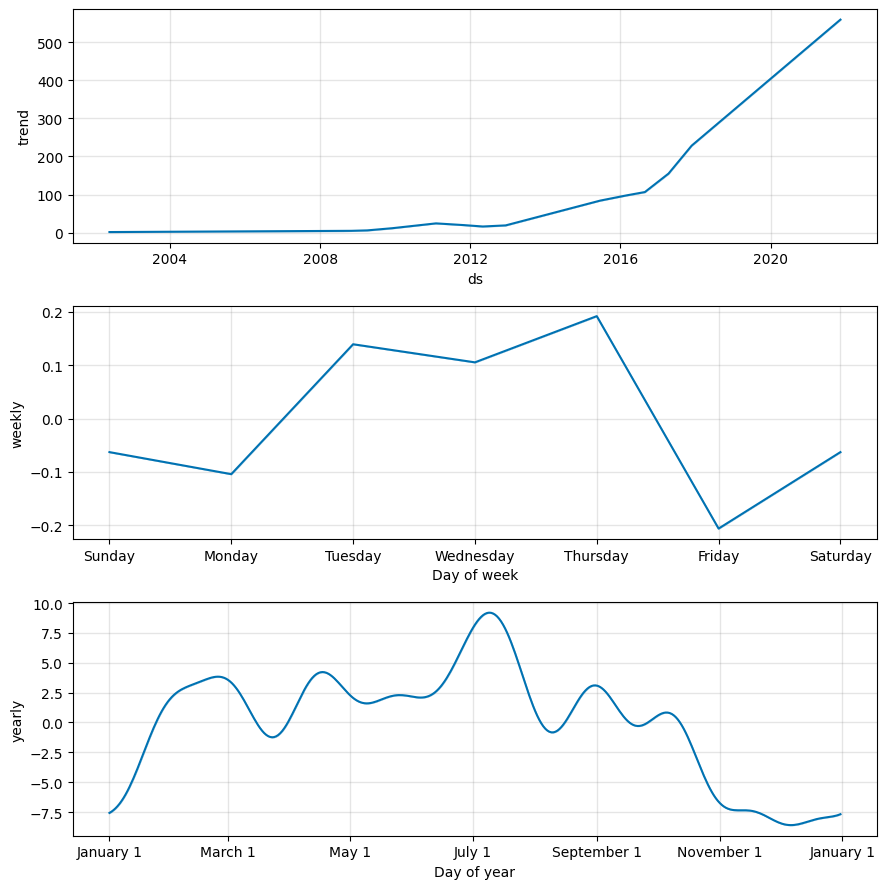

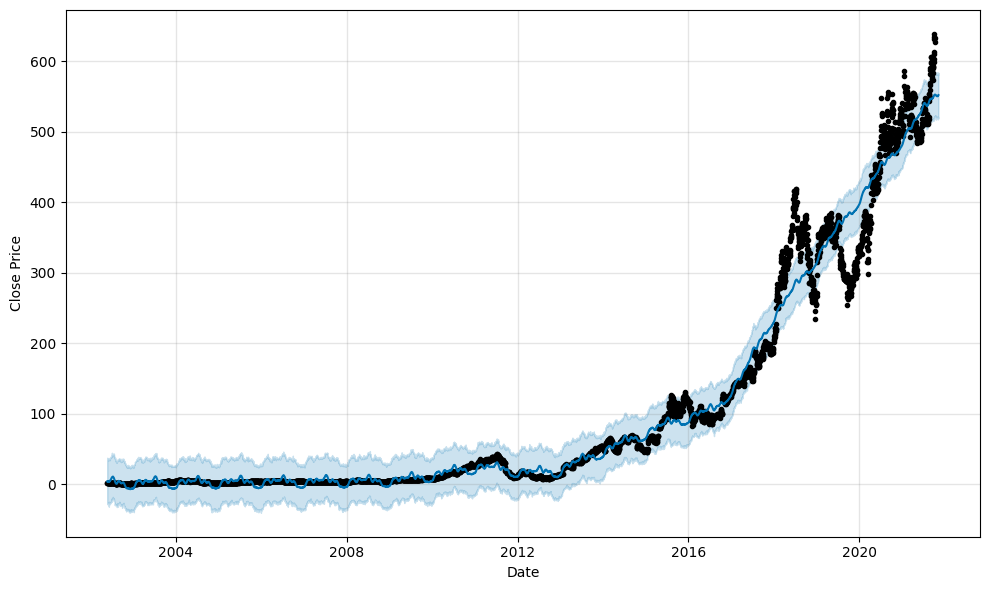

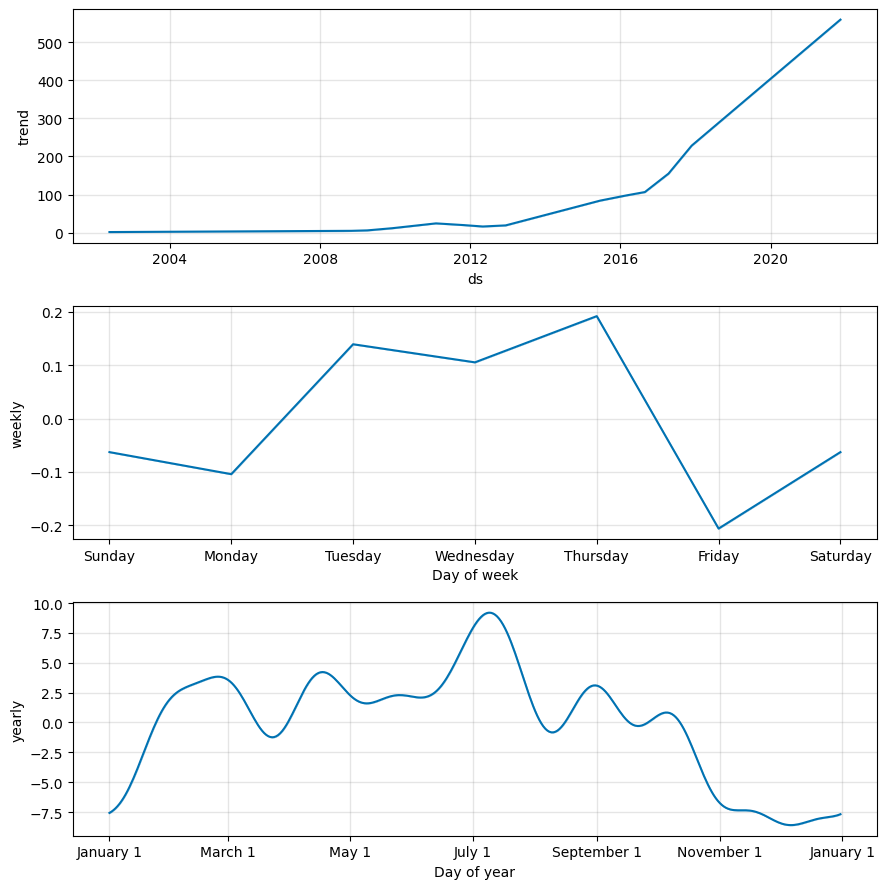

In [ ]:
model.plot(forecast, xlabel='Date', ylabel='Close Price')
model.plot_components(forecast)

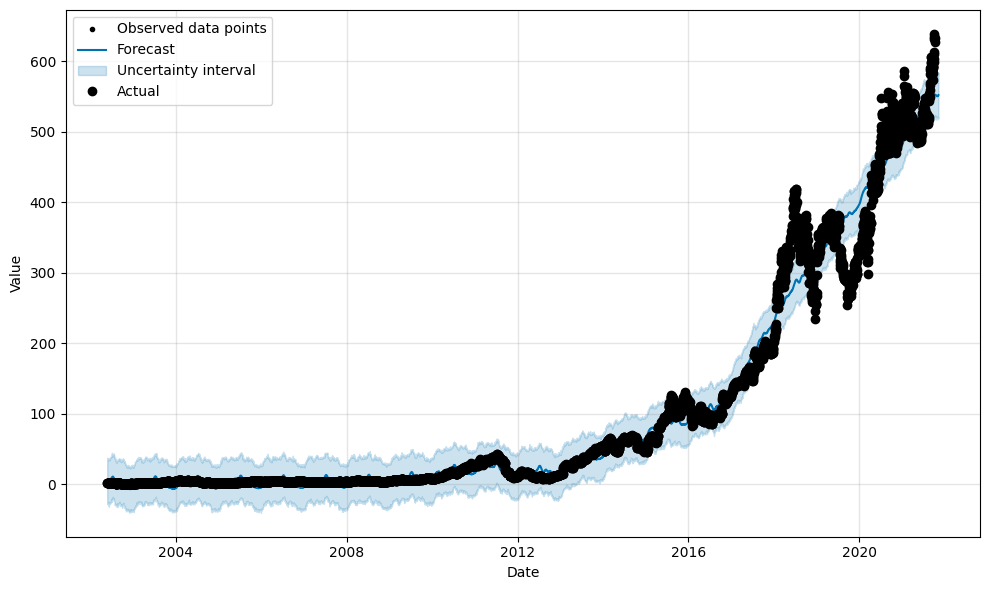

In [ ]:
import matplotlib.pyplot as plt
model.plot(forecast, xlabel='Date', ylabel='Value')
plt.plot(df['ds'], df['y'], 'ko', label='Actual')  # Plotting actual values as black dots
plt.legend()
plt.show()

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly
plot_plotly(model,forecast)

In [ ]:
# Calculate MAE and MSE
mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)

In [ ]:
# Print the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 45.911863948448215
Mean Squared Error (MSE): 2490.441521927795


In [ ]:
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 49.90432367969528
